In [76]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [77]:
# CutOut 적용을 위한 Transform 클래스 정의
class CutOut:
    def __init__(self, size=16):  # CutOut 크기 설정
        self.size = size

    def __call__(self, img):  # 이미지에 CutOut 적용
        img = img.clone()  # 원본 텐서를 변경하지 않도록 복사
        c, h, w = img.shape  # 이미지의 채널, 높이, 너비 가져오기
        cutout_size = min(self.size, h, w)  # 이미지보다 큰 CutOut 방지
        x = torch.randint(0, w - cutout_size + 1, (1,)).item()  # CutOut 영역의 x 좌표 랜덤 선택
        y = torch.randint(0, h - cutout_size + 1, (1,)).item()  # CutOut 영역의 y 좌표 랜덤 선택
        img[:, y:y+cutout_size, x:x+cutout_size] = 0  # 정사각형 영역을 검은색(0)으로 채움
        return img  # 변환된 텐서 반환

# 데이터 변환 설정 (ToTensor 및 CutOut 적용)
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 PyTorch 텐서로 변환
    CutOut(size=16),  # CutOut 적용
])

In [78]:
# CIFAR-10 데이터 로드
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)  # 데이터 로더 추가

In [79]:
# 샘플 데이터 10개 선택
num_samples = 10  # 출력할 샘플 개수 설정
sample_images = []
sample_labels = []
for img, label in train_loader:
    sample_images = img[:num_samples]  # 배치에서 10개 선택
    sample_labels = label[:num_samples]  # 라벨 저장
    break  # 한 번만 실행

In [80]:
# CIFAR-10 클래스 레이블 (0~9까지 각 클래스의 이름)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

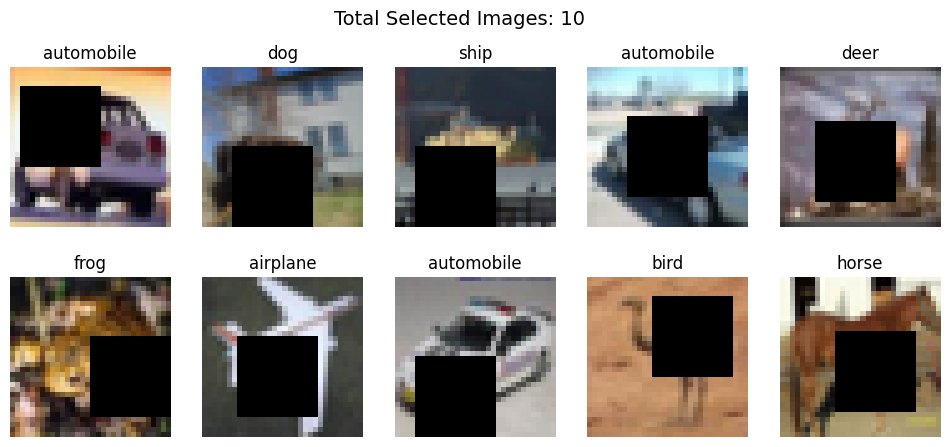

In [81]:
# 샘플 데이터 시각화
fig, axes = plt.subplots(2, 5, figsize=(12, 5))  # 2행 5열의 서브플롯 생성
fig.suptitle(f"Total Selected Images: {num_samples}", fontsize=14)  # 총 선택된 이미지 개수 출력

for i in range(num_samples):  # 선택된 10개 이미지 반복
    ax = axes[i // 5, i % 5]  # 2x5 그리드 내 위치 설정
    img = sample_images[i].permute(1, 2, 0).numpy()  # 텐서를 NumPy 배열로 변환 (채널 순서 변경)
    img = np.clip(img, 0, 1)  # NumPy 배열 변환 후 클리핑 (정규화 유지)
    ax.imshow(img)  # 이미지 출력
    ax.set_title(classes[sample_labels[i].item()])  # 해당 이미지의 클래스 이름 표시
    ax.axis("off")  # 축 정보 제거

plt.show()  # 최종 출력